# STOR-601 C++ for Python Programmers - Assessment

# Task 1

#### Using a jupyter notebook with a c++ 17 kernel, write a C++ implementation of the Fundamental Algorthim that you have already coded in Python as part of the assessent for the [STOR-601 module "Introductory Python"](https://github.com/NewmanTHP/Python-Assignment---Stable-Marriage/blob/main/Python%20Assignment.ipynb) (task 7 part b).

#### a. creating dictionaries for male and female preference tables

In [1]:
#include <map>
#include <list>
#include <iostream>
#include <string>
#include <vector>
#include <algorithm> 
#include <iterator>

In [2]:
std::map<std::string,std::vector<std::string>> ex_male;
std::map<std::string,std::vector<std::string>> ex_female;

In [3]:
ex_male["A"] = {"c","b","d","a"};
ex_male["B"] = {"b","a","c","d"};
ex_male["C"] = {"b","d","a","c"};
ex_male["D"] = {"c","a","d","b"};

(std::vector &) { "c", "a", "d", "b" }


In [4]:
ex_female["a"] = {"A","B","D","C","Om"};
ex_female["b"] = {"C","A","D","B","Om"};
ex_female["c"] = {"C","B","D","A", "Om"};
ex_female["d"] = {"B","A","C","D", "Om"};

(std::vector &) { "B", "A", "C", "D", "Om" }


#### b. creating the matching function

In [5]:
struct RetrieveKey
{
    template <typename T>
    typename T::first_type operator()(T keyValuePair) const
    {
        return keyValuePair.first;
    }
};

struct CompareFirst
{
  CompareFirst(std::string val) : val_(val) {}
  bool operator()(const std::pair<std::string,std::string>& elem) const {
    return val_ == elem.second;
  }
  private:
    std::string val_;
};

In [6]:
std::vector<std::pair<std::string, std::string> > finding_stable_matching(std::map<std::string,std::vector<std::string> > ex_male, std::map<std::string,std::vector<std::string> > ex_female)
{
    std::vector<std::string> list_male;

    // Retrieve all keys from male map
    std::transform(ex_male.begin(), ex_male.end(), back_inserter(list_male), RetrieveKey());
    // Initialising k to 0 and n to the number of males 
    int k {0} ;
    int n = list_male.size();
    // Creating a vector of original matchings (i.e. all females matched to "undesirable male")
    std::string omega{"Om"};
    std::vector<std::pair<std::string, std::string> > matching;
    matching = {{omega,"a"},{omega,"b"},{omega,"c"},{omega,"d"}};
    
    while (k<n){
        // Selecting the kth male from the list (i.e. the current suitor)
        std::string X{list_male[k]};
        while (X!=omega){
            // Preferred choice on current male's list
            std::string x{ex_male[X][0]};
            // Obtaining the couple of current male's preferred choice
            std::vector<std::pair<std::string,std::string> >::iterator if_x_couple = std::find_if(matching.begin(),matching.end(), CompareFirst(x));
            int current_pair_position = std::distance(matching.begin(), if_x_couple);
            std::pair<std::string,std::string> x_couple{matching[current_pair_position]};
            // Male with whom current male's preferred choice is currently coupled
            std::string x_fiance{x_couple.first};
            // Obtain a list of preference for current male's preferred choice
            std::vector<std::string> list_of_x_choice = ex_female[x];
            // Current ranking of male suitor in the preference of his preferred choice
            std::vector<std::string>::iterator if_X = std::find(list_of_x_choice.begin(), list_of_x_choice.end(), X);
            int current_male_position_in_x = std::distance(list_of_x_choice.begin(), if_X);
            // Current ranking of the partner of the current suitor's preferred choice
            std::vector<std::string>::iterator if_x_fiance = std::find(list_of_x_choice.begin(), list_of_x_choice.end(), x_fiance);
            int current_partner_position_in_x = std::distance(list_of_x_choice.begin(), if_x_fiance);
            if (current_male_position_in_x<current_partner_position_in_x){
                // Matching x (i.e. the female) with the current suitor 
                x_couple.first = X;
                matching[current_pair_position] = x_couple;
                // Setting the new suitor to be the old partner of x
                X = x_fiance;
            }
            if (X!=omega){
                    // removing x (i.e. the female) from the list of preference of X (i.e. the new suitor)
                    std::remove(ex_male[X].begin(),ex_male[X].end(),x);
            }
                
        }
        // Increase K by 1
        k++;
    }
    return matching;
}

In [7]:
finding_stable_matching(ex_male, ex_female)

(std::vector<std::pair<std::string, std::string> >) { {"B" , "a"}, {"C" , "b"}, {"D" , "c"}, {"A" , "d"} }


# Task 2

#### This is a list of all the different types of data structures in the algorithm in Task1. For each data structure an additional paragraph details its computational complexity.

#### - Vectors: 
 1) <ins>Random access</ins>: This has been used within the algorithm and has an associated constant cost of $\mathcal{O}(1)$.   Therefore, does not depedn on the size of the set. Ex: line 17.
 
 2) <ins>Insertion or removal of elements</ins>: This operation has a cost $\mathcal{O}(n)$, linear in the distance to the end of the vector. Ex: line 44.
 
 3) <ins>Insertion or removal of elements at the end</ins>: This operation does not have a constant cost, instead the average time per operation if many are repeated is $\mathcal{O}(1)$. Ex: line 6.
 
 4) <ins>size()</ins>: Returns the number of elements in the vector has constant cost $\mathcal{O}(1)$. Ex: line 9.
 
 5) <ins>find()</ins> and <ins>find_if</ins>: Searches the vector and returns the first occurrence of the parameter in the vector. Its time complexity is $\mathcal{O}(n)$ where N is the size of the vector. Ex: line 22, 30, 33.
 
 6) <ins>distance()</ins>: Find the total no. of elements between the two elements in the vector. Has cost of $\mathcal{O}(n)$. Ex: line 23, 31, 34.


#### - Map:
1) <ins>Search, removal and insertion</ins>: These operations have complexity $\mathcal{O}(log(n))$. Ex: line 28


#### Some of these operation are contained within for loops, these make the computational complexity the algorithm, $\mathcal{O}(n^2)$.

# Task 3

### Screenshot from the compiler

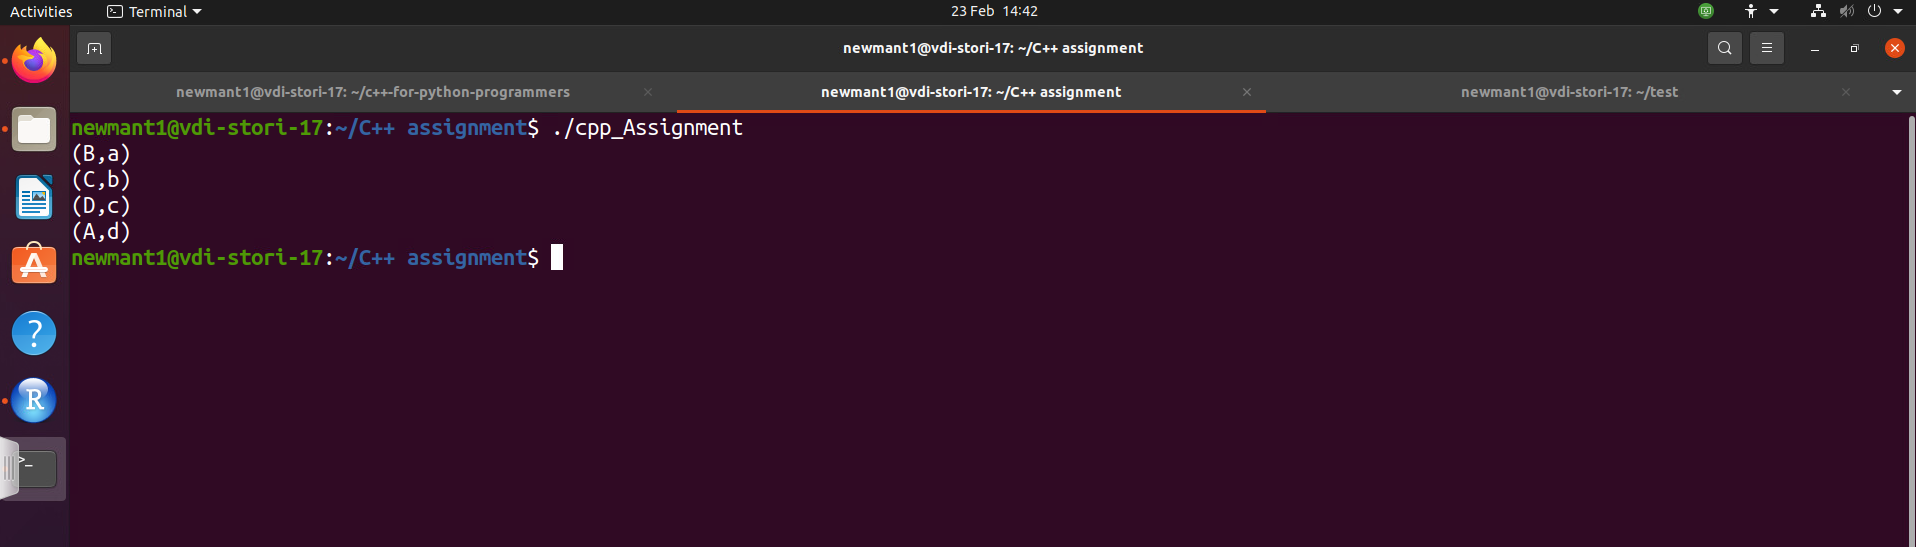